# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    StandardScaler
)

In [0]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [0]:
countries = pd.read_csv("countries.csv")

In [0]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [19]:
# Sua análise começa aqui.
#Dataframe auxiliar, para ajudar na análise.
exploration = pd.DataFrame({'type': countries.dtypes,
                            'amount': countries.isna().sum(),
                            'percentage': (countries.isna().sum() / countries.shape[0]) * 100,
                            'unique values': countries.nunique()})
                            

exploration


,type,amount,percentage,unique values
Country,object,0,0.000000,227
Region,object,0,0.000000,11
Population,int64,0,0.000000,227
Area (sq. mi.),int64,0,0.000000,226
Pop. Density (per sq. mi.),object,0,0.000000,219
Coastline (coast/area ratio),object,0,0.000000,151
Net migration,object,3,1.321586,157
Infant mortality (per 1000 births),object,3,1.321586,220
GDP ($ per capita),float64,1,0.440529,130
Literacy (%),object,18,7.929515,140


In [0]:
def data_transformation(df):
    """Adjusting the data set."""

    # Alterando o separador decimal e convertendo as variáveis em numéricas:
    df.iloc[0:, 4:] = df.iloc[0:, 4:].replace(',', '.', regex=True).astype(float)

    # Removendo os espaços em branco no começo e no final da string:
    df = df.applymap(lambda x: x.strip() if type(x)==str else x)
    return df

# Chamando a função:
countries = data_transformation(countries)

In [28]:
countries.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [21]:
def q1():
     # Obtem os valores únicos das regiões
    region = countries['Region'].unique()
    # Este comando, retira os espaços à frente e atrás das strings    
    region = [country.strip() for country in region]
    # Realizando a ordenação da lista
    region.sort()
    
    return region
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [0]:
#Importando o pacote
from sklearn.preprocessing import KBinsDiscretizer

In [32]:
def q2():
    kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    pop_density_discrete = kbins.fit_transform(countries['Pop_density'].values.reshape(-1, 1))
    # o índice 9 é o nosso último, pois estamos dividindo em 10 e queremos o último percentil
    return int((pop_density_discrete==9).sum())

q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [0]:
def q3():
    #One Hot enconding para np.int
    # One hot encoding é uma representação de variáveis categóricas como vetores binários
    one_hot_encoder = OneHotEncoder(sparse=False)
    
    #Realizando a codificação das variáveis
    region_climate_encoded = one_hot_encoder.fit(countries[['Region', 'Climate']].fillna('0').astype('str'))
    
    #Selecionando as novas features geradas
    new_attributes = region_climate_encoded.get_feature_names()
    
    return len(new_attributes)
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [0]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]
# Transformando test_country em DataFrame
df_test_country = pd.DataFrame(test_country)
# Transpondo o DataFrame para que cada valor corresponda a uma coluna 
df_test_country = df_test_country.T
# Renomeando as colunas
df_test_country.columns = new_column_names

df_test_country
df_test_country.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_density',
       'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'GDP',
       'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate',
       'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [0]:
# Selecionar as colunas numéricas 
col_to_pipeline = []
for col in countries.columns:
     if countries[col].dtype == 'int64' or countries[col].dtype == 'float64':
            col_to_pipeline.append(col)
len(col_to_pipeline)

18

In [0]:
def q4():
    # Criando Pipeline
    num_pipeline = Pipeline(steps=[
                                ('imputer', SimpleImputer(strategy='median')),
                                ("standard_scaler", StandardScaler()),
                                  ])
    # Treinando o Pipeline com os steps passados
    num_pipeline.fit(countries[col_to_pipeline])
    # Aplicando modelo de pipeline no dataFrame test_country
    test_country_transformed = num_pipeline.transform(df_test_country[col_to_pipeline])
    # Transformando em dataFrame
    test_country_transformed = pd.DataFrame(test_country_transformed, columns=col_to_pipeline)
    return list(round(test_country_transformed['Arable'],3))[0]

q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

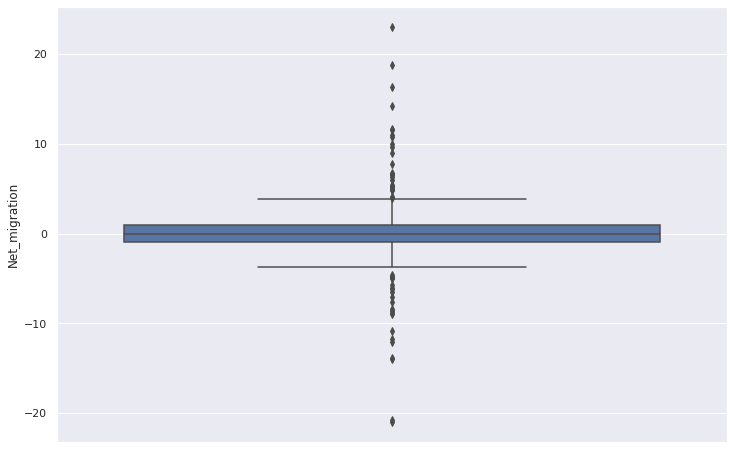

In [0]:
#sns.boxplot(countries['Net_migration'], orient='vertical')

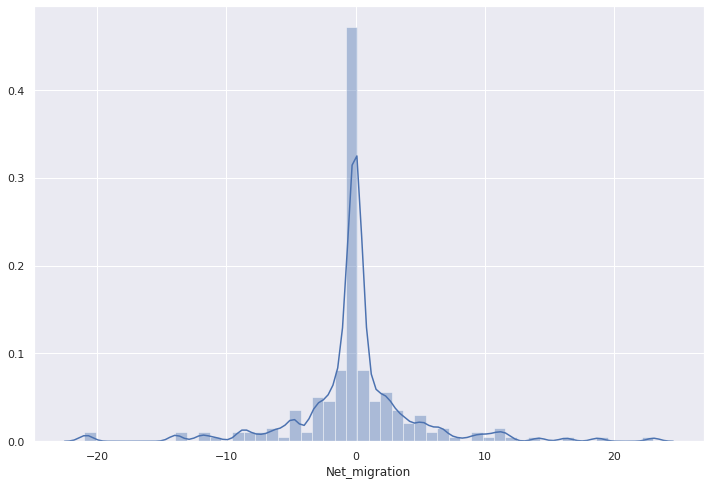

In [0]:
#sns.distplot(countries['Net_migration']);

In [0]:
#Definindo o primeiro quartil 0.25
qt1 = countries['Net_migration'].quantile(0.25)

#Definindo o terceiro quartil 0.75
qt3 = countries['Net_migration'].quantile(0.75)

#Determinando a Amplitude Interquartil
IQR = qt3 - qt1

In [0]:
#Ourliers Superiores
higher_outliers_point = qt3 + 1.5*IQR

#Ourliers Inferiores
lower_outliers_point = qt1 - 1.5*IQR

In [0]:
higher_outliers = countries[countries['Net_migration'] > higher_outliers_point]['Net_migration']
higher_outliers

0      23.06
4       6.60
6      10.76
11      3.98
28     10.01
36      5.96
38     18.75
70      6.27
91      5.24
98      4.99
99      5.36
105     6.59
111    14.18
119     4.85
121     8.97
122     4.86
134     6.78
138     7.75
149     4.05
153     9.61
166    16.29
177    10.98
184    11.53
188     5.37
196     4.05
208    11.68
Name: Net_migration, dtype: float64

In [0]:
#Registros abaixo do ponto lower_outlieres_point

lower_outliers = countries[countries['Net_migration'] < lower_outliers_point]['Net_migration']
lower_outliers

1      -4.93
3     -20.71
7      -6.15
9      -6.47
13     -4.90
30     -4.58
37    -12.07
56    -13.87
59     -8.58
75     -4.70
80     -8.37
81    -13.92
102    -4.92
130    -6.04
135    -4.87
136   -20.99
172    -7.11
174    -4.86
175    -7.64
176   -11.70
182    -5.69
193    -8.81
204   -10.83
220    -8.94
Name: Net_migration, dtype: float64

In [0]:
#Registros abaixo do ponto lower_outlieres_point

higher_outliers = countries[countries['Net_migration'] > higher_outliers_point]['Net_migration']
higher_outliers

0      23.06
4       6.60
6      10.76
11      3.98
28     10.01
36      5.96
38     18.75
70      6.27
91      5.24
98      4.99
99      5.36
105     6.59
111    14.18
119     4.85
121     8.97
122     4.86
134     6.78
138     7.75
149     4.05
153     9.61
166    16.29
177    10.98
184    11.53
188     5.37
196     4.05
208    11.68
Name: Net_migration, dtype: float64

In [0]:
countries.shape

(227, 20)

In [0]:
total_outliers = len(higher_outliers) + len(lower_outliers)
total_outliers

50

In [0]:
def q5():
    return(len(lower_outliers), len(higher_outliers),False)
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [0]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [0]:
def q6():
    #Arrumando a matriz dos grupos selecionados para contagem
    count_vectorizer = CountVectorizer()
    newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
    
    #Retornando: quantidade de vezes que palavra phone aparece
    return int(newsgroups_counts[:, count_vectorizer.vocabulary_['phone']].sum())
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [0]:
def q7():
    #Configurando a matriz tf-idf dos grupos selecionados
    tfidf_vectorizer = TfidfVectorizer()
    newsgroups_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroups.data)
    
    #Retornando tf-idf da palavra 'phone': 
    return float(round(newsgroups_tfidf_vectorized[:, tfidf_vectorizer.vocabulary_['phone']].sum(), 3))
q7()

8.888